# DATA SCIENCE & AI (FIAP MBA) - Sabrina Otoni da Silva - 2023

## Projeto nº 18

### Enunciado

A partir dos dados housing.csv (mais informacoes [aqui](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)), realize toda análise exploratória necessária e prepare os dados para algoritmos de machine learning usando a Scikit-Learn. Treine um modelo de regressão linear que prediga a variável meta (median_house_value) e cujo valor de RMSE seja menor ou igual a 69000.

In [1]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#importando os dados e lendo as 5 primeiras linhas
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
#buscando informações sobre os dados que vamos trabalhar
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#descobrindo a quantidade de cada valor que temos da coluna que compõe valores categóricos (para tratar posteriormente)
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
#entendendo algumas informações estatísticas relevantes para nossas análises
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

<Axes: >

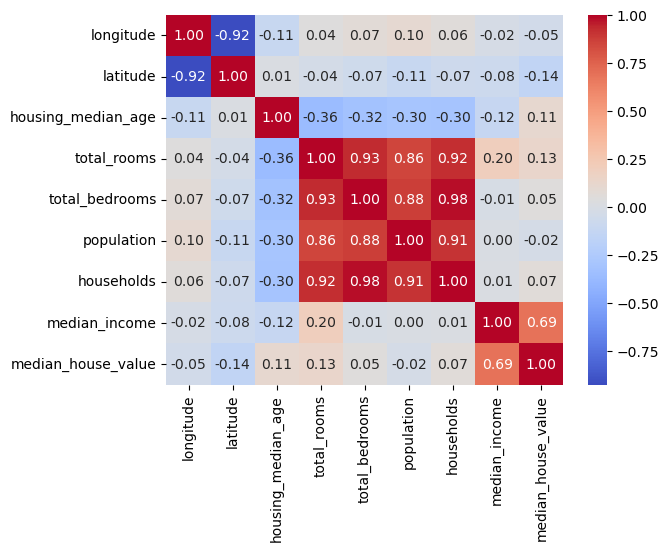

In [6]:
#análise de correlação das variáveis independentes X nossa target
sns.heatmap(housing.iloc[:, 0:9].corr(), cmap='coolwarm', annot=True, fmt='.2f')

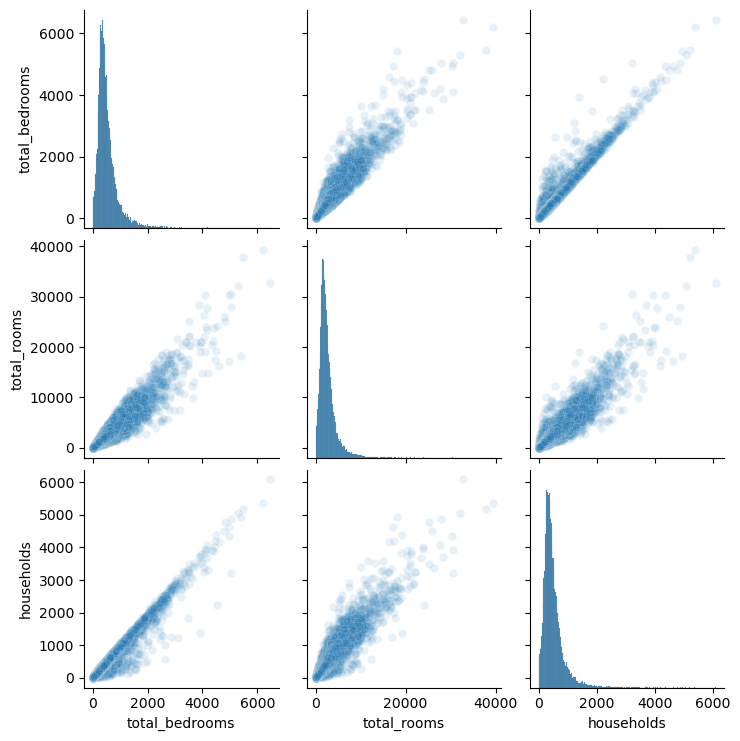

In [7]:
#total_bedrooms, total_rooms e households tem uma grande correlação
sns.pairplot(housing.loc[:, ['total_bedrooms', 'total_rooms', 'households']], plot_kws={'alpha': 0.1})

In [8]:
#utilizando scikit learn para um preenchimento mais inteligente sobre os valores nulos de total_bedroom
housing_numeric = housing.drop('ocean_proximity', axis=1)
imputer = IterativeImputer()
imputer

IterativeImputer()

In [9]:
housing_imputing = imputer.fit_transform(housing_numeric)
housing_imputed = pd.DataFrame(housing_imputing, columns=housing_numeric.columns)
housing_imputed

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  
0           322.0       126.0         8.3252            452600.0  
1          2401.0      1138.0         8.3014            358500.0  
2           496.0       177.0         7.2574            352100.0  
3           558.0       219.0         5.6431            341300.0  
4           565.0       259.0         3.8462            342200.0  
...           ...         ...            ...                 ...  
20635       845.0       330.0         1.5603             78100.0  
20636       356.0       114.0         2.5568             77100.0  
20637      1007.0       433.0         1.7000             92300.0  
20638       741.0       349.0         1.8672             84700.0  
20639      1387.0       530.0         2.3886             89400.0  

[20640 rows x 9 columns]

In [10]:
#valores nulos preenchidos
housing_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [11]:
#colocando novamente a nossa coluna categórica que foi retirada apenas para não atrapalhar no preenchimento dos dados nulos
housing_imputed['ocean_proximity'] = housing_imputed.apply(lambda _: '', axis=1)
for i in range(len(housing_imputed)):
    housing_imputed.loc[i, ['ocean_proximity']] = housing.loc[i,['ocean_proximity']]
housing_imputed

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [12]:
#número de linhas igualados, sem nenhuma perda de dado
housing_imputed.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20640
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [13]:
#adicionando uma nova coluna categórica para melhor representação de renda da população
#(median_income tem uma grande correlação com nossa target)
housing_imputed['representative_income'] = np.ceil(housing_imputed['median_income'] / 1.5)

In [14]:
housing_imputed['representative_income'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: representative_income, dtype: int64

In [15]:
housing_imputed['representative_income'].where(housing_imputed['representative_income'] < 5, 5.0, inplace=True)

In [16]:
#renda categorizada de 1 a 5
housing_imputed['representative_income'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: representative_income, dtype: int64

In [17]:
#tirando amostra estratificada do nosso dataset utilizando scikit learn
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for index1, index2 in split.split(housing_imputed, housing_imputed['representative_income']):
    strat_set1 = housing_imputed.loc[index1]
    strat_set2 = housing_imputed.loc[index2]
strat_set1.drop('representative_income', axis=1, inplace=True)
strat_set2.drop('representative_income', axis=1, inplace=True)
housing_imputed

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  representative_income  
0            NEAR BAY                    5.0  
1            NEAR BAY                    5.0  
2            NEAR BAY                    5.0  
3            NEAR BAY                    4.0  
4            NEAR BAY                    3.0  
...               ...                    ...  
20635          INLAND                    2.0  
20636          INLAND                    2.0  
20637          INLAND                    2.0  
20638          INLAND                    2.0  
20639          INLAND                    2.0  

[20640 rows x 11 columns]

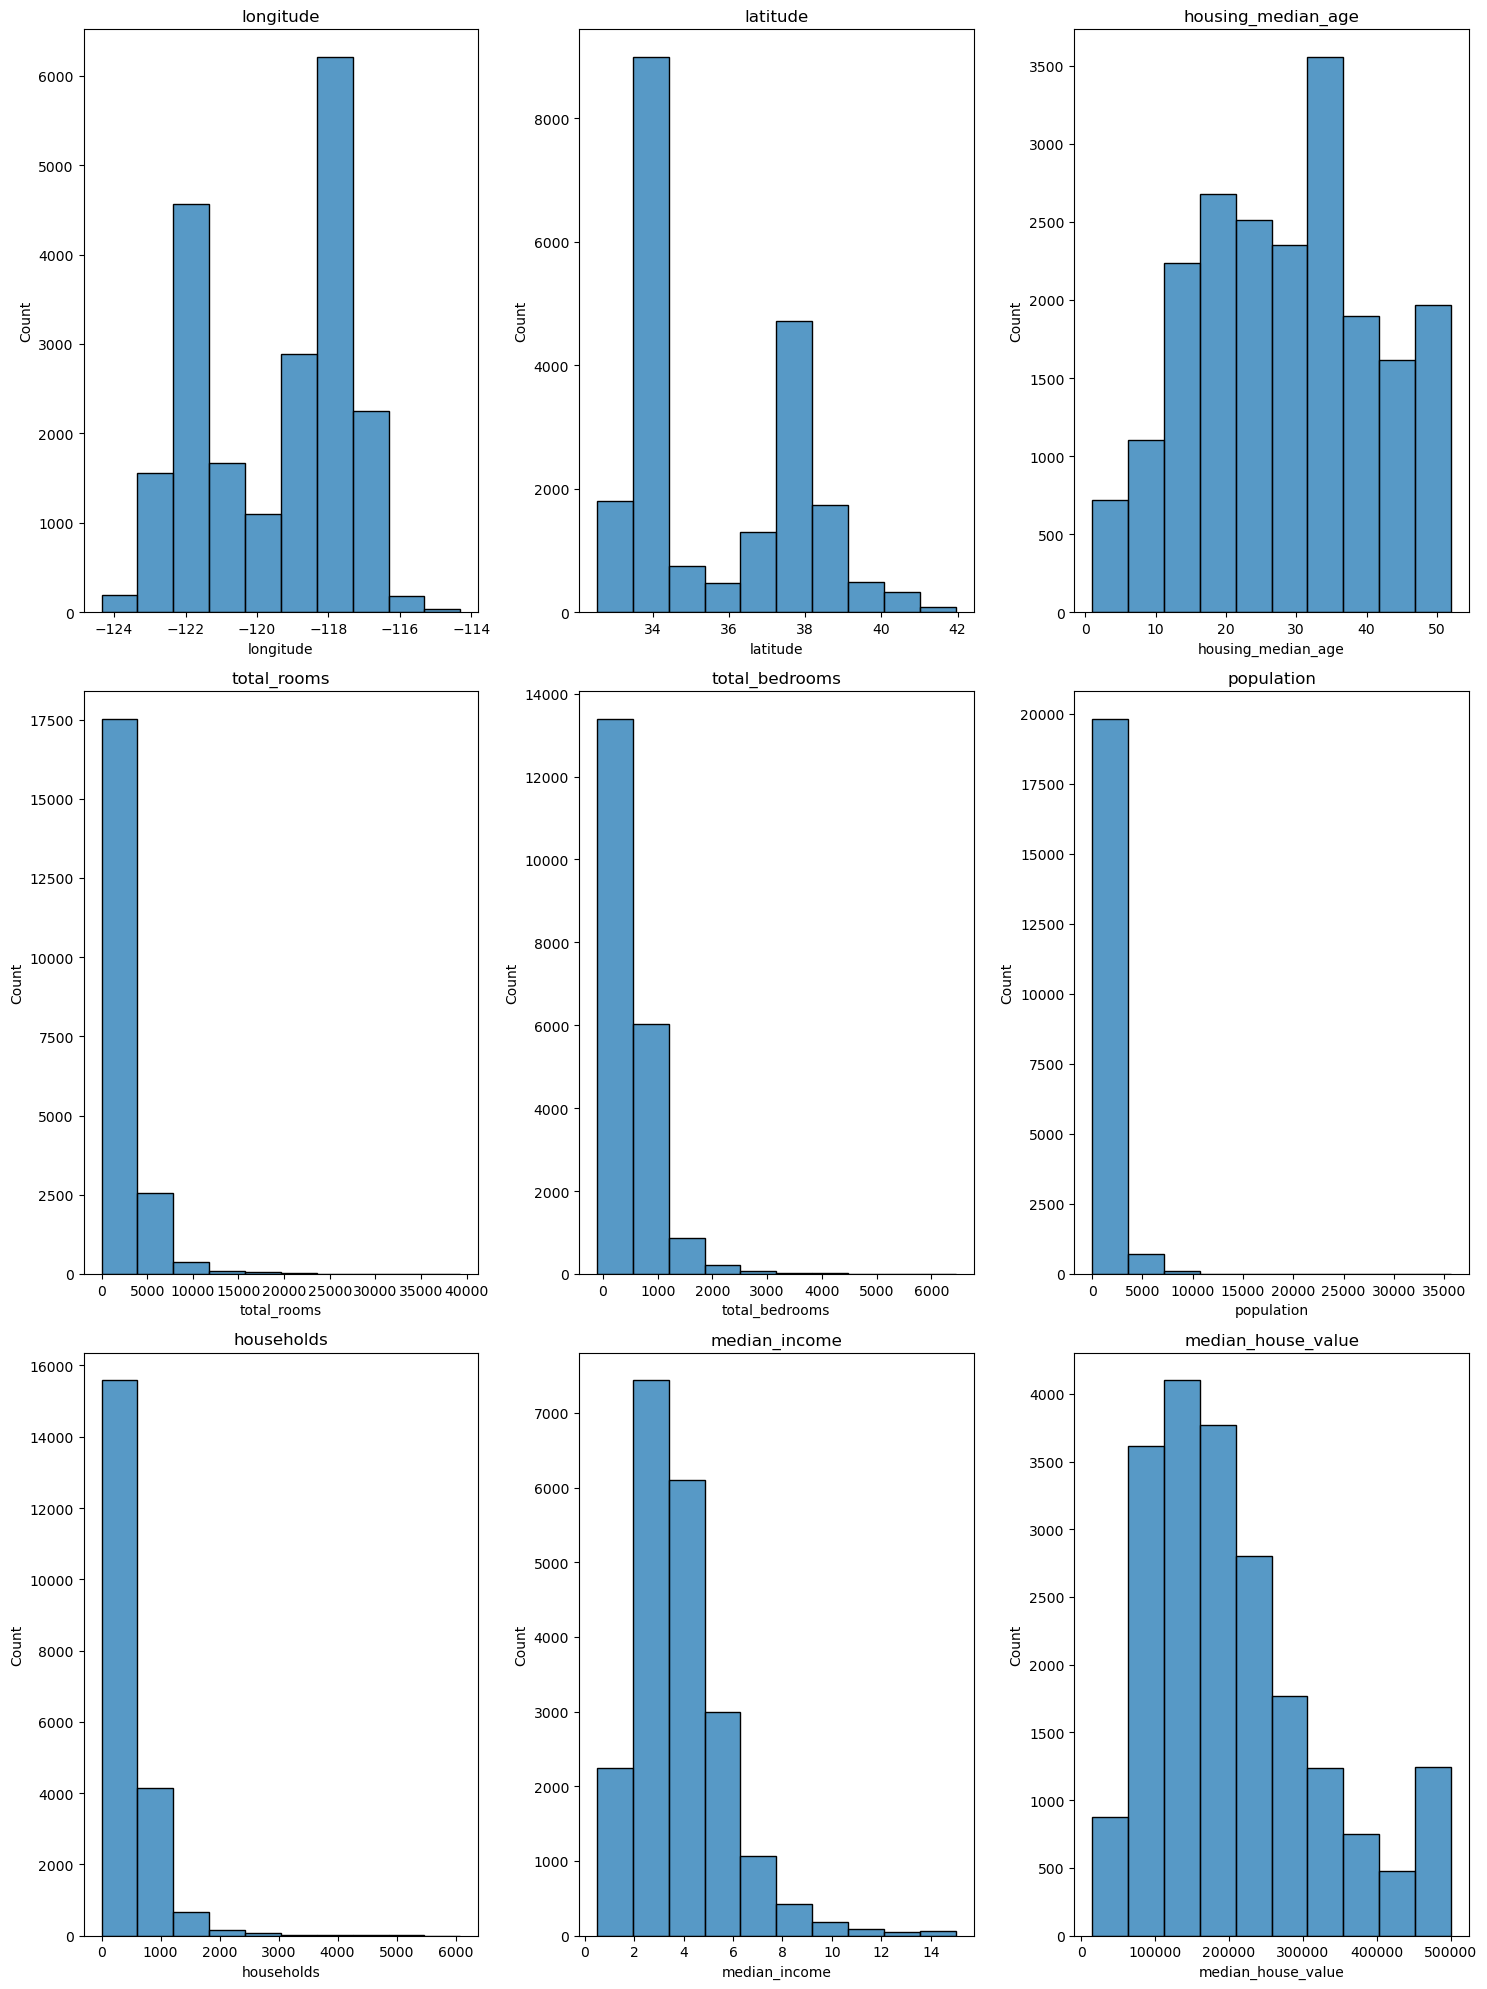

In [18]:
#analisando outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(housing_imputed.columns):
    if column not in ['ocean_proximity', 'representative_income']:
        sns.histplot(housing_imputed[column], ax=axes[i], bins=10)
        axes[i].set_title(column)

plt.tight_layout()
plt.show()

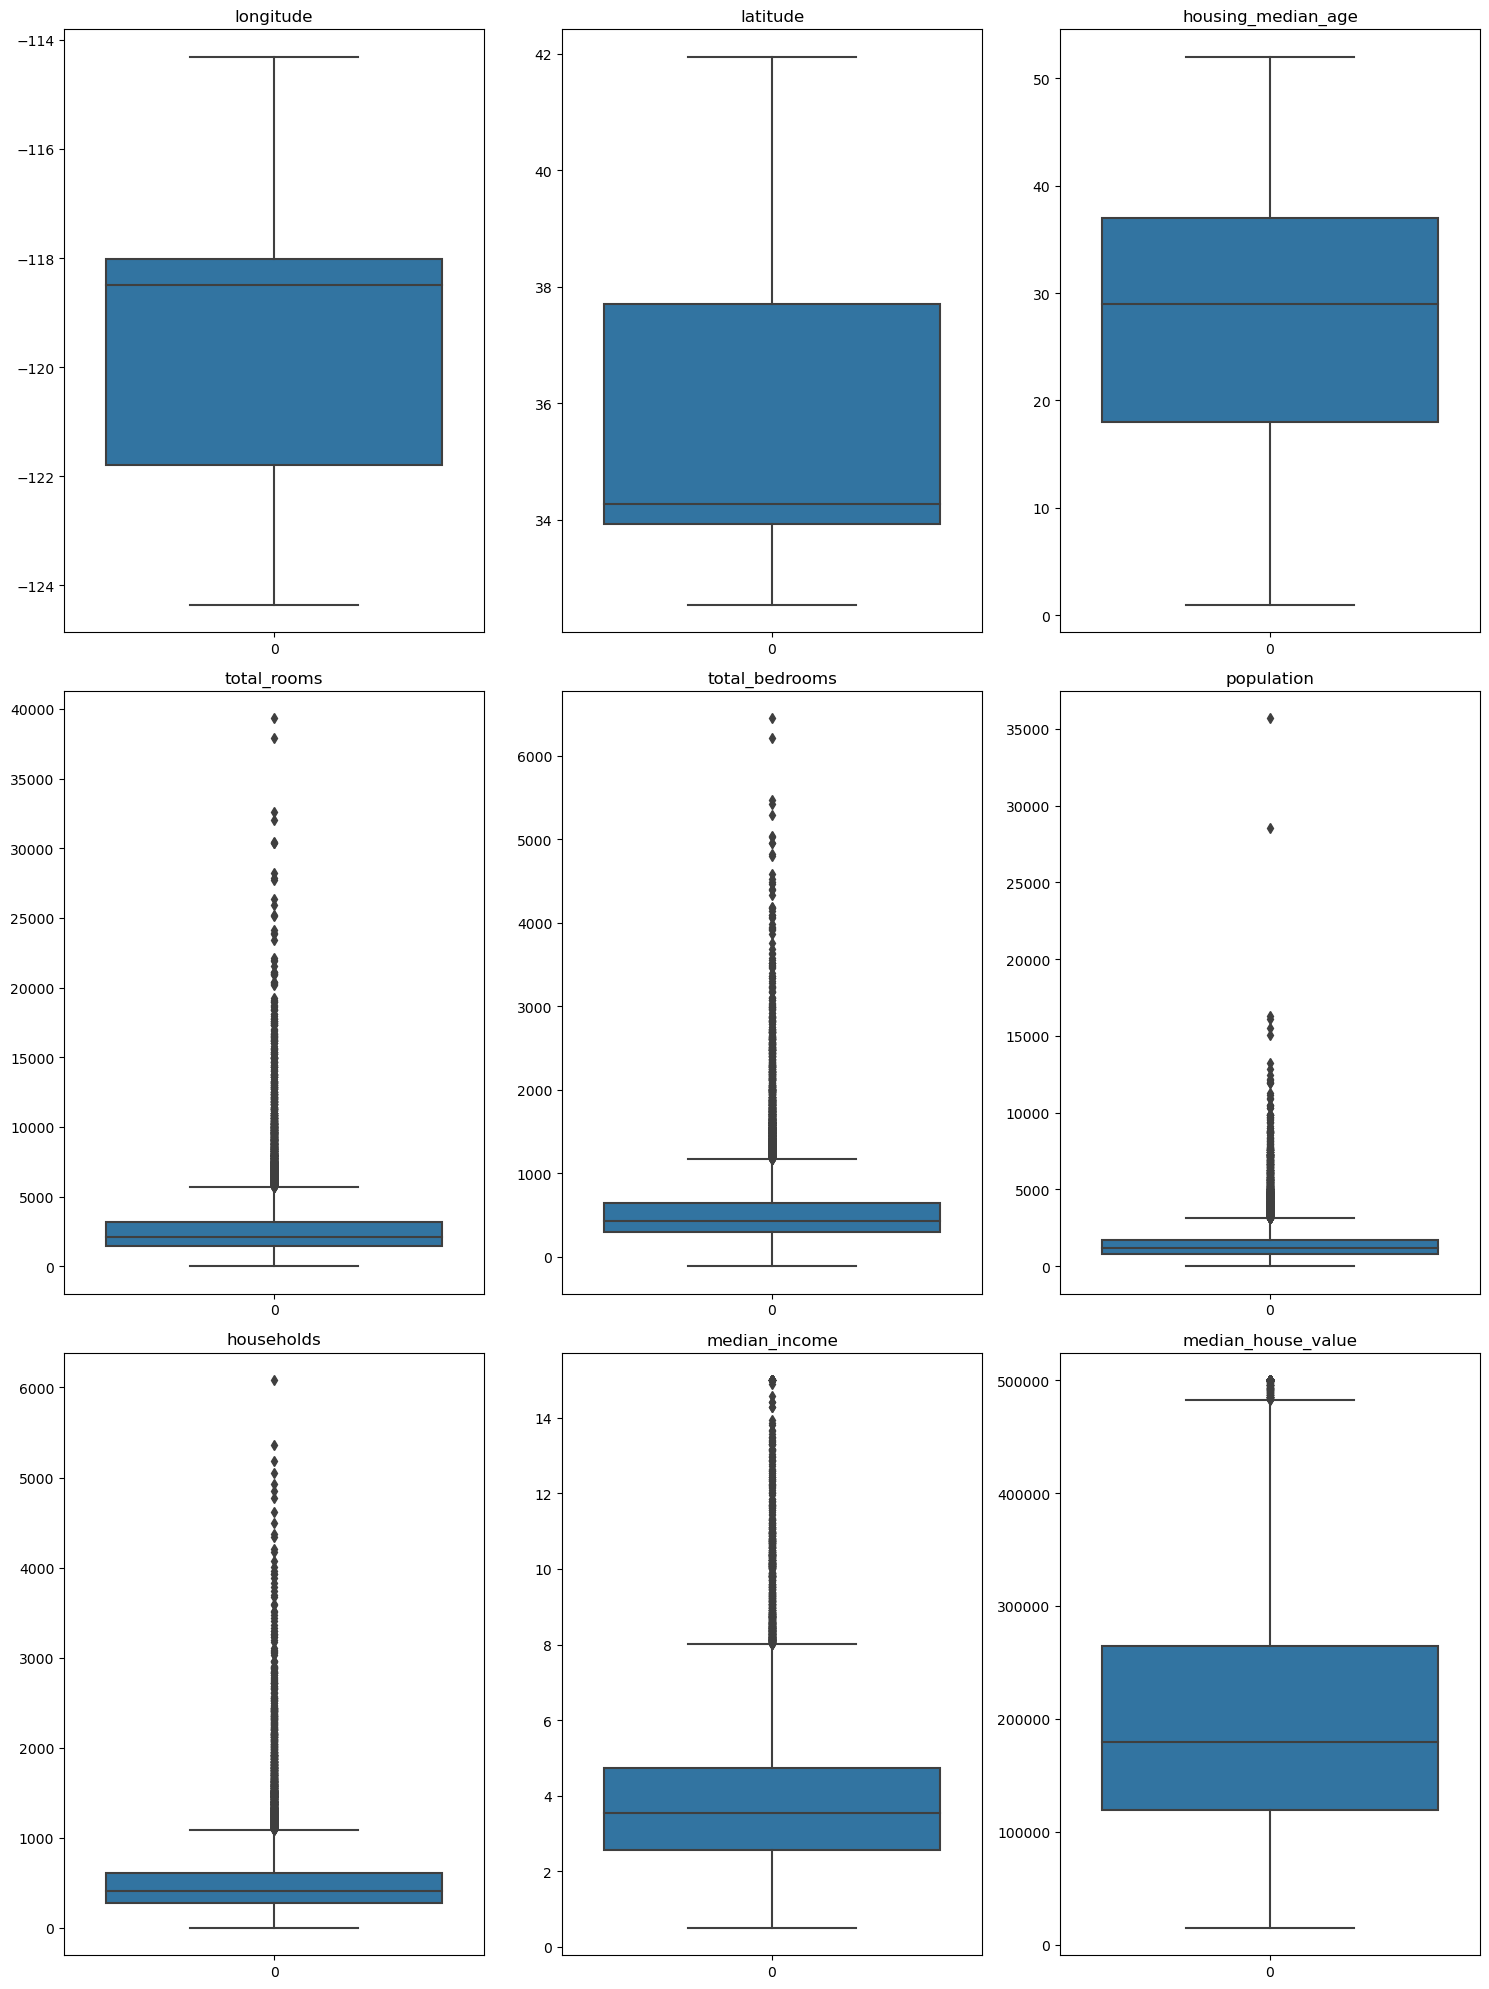

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(housing_imputed.columns):
    if column not in ['ocean_proximity', 'representative_income']:
        sns.boxplot(housing_imputed[column], ax=axes[i])
        axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [20]:
#corrigindo outliers baseado nos valores de limite do boxplot de cada coluna
def IQR(col):
    q1 = housing_imputed[col].quantile(0.25)
    q3 = housing_imputed[col].quantile(0.75)
    iqr = q3 - q1
    return iqr, q1, q3

def limit(col):
    iqr, q1, q3 = IQR(col)
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

for col in housing_imputed.columns:
    if housing_imputed[col].dtype != 'object':
        lowlim, uplim = limit(col)
        print(f'Coluna: {col}\n Limite Inferior: {lowlim}\n Limite Superior: {uplim}')

Coluna: longitude
 Limite Inferior: -127.48499999999999
 Limite Superior: -112.32500000000002
Coluna: latitude
 Limite Inferior: 28.259999999999998
 Limite Superior: 43.38
Coluna: housing_median_age
 Limite Inferior: -10.5
 Limite Superior: 65.5
Coluna: total_rooms
 Limite Inferior: -1102.625
 Limite Superior: 5698.375
Coluna: total_bedrooms
 Limite Inferior: -230.5
 Limite Superior: 1173.5
Coluna: population
 Limite Inferior: -620.0
 Limite Superior: 3132.0
Coluna: households
 Limite Inferior: -207.5
 Limite Superior: 1092.5
Coluna: median_income
 Limite Inferior: -0.7063750000000004
 Limite Superior: 8.013024999999999
Coluna: median_house_value
 Limite Inferior: -98087.5
 Limite Superior: 482412.5
Coluna: representative_income
 Limite Inferior: -1.0
 Limite Superior: 7.0


In [21]:
#filtrando as colunas com outliers e atribuindo os valores dos limites aos outliers
def outliers(value):
    lower_limit, upper_limit = limit(col)
    housing_imputed[col] = np.where(housing_imputed[col] < lower_limit, lower_limit, housing_imputed[col])
    housing_imputed[col] = np.where(housing_imputed[col] > upper_limit, upper_limit, housing_imputed[col])

for col in housing_imputed.columns:
    if housing_imputed[col].dtype != 'object':
        outliers(col)

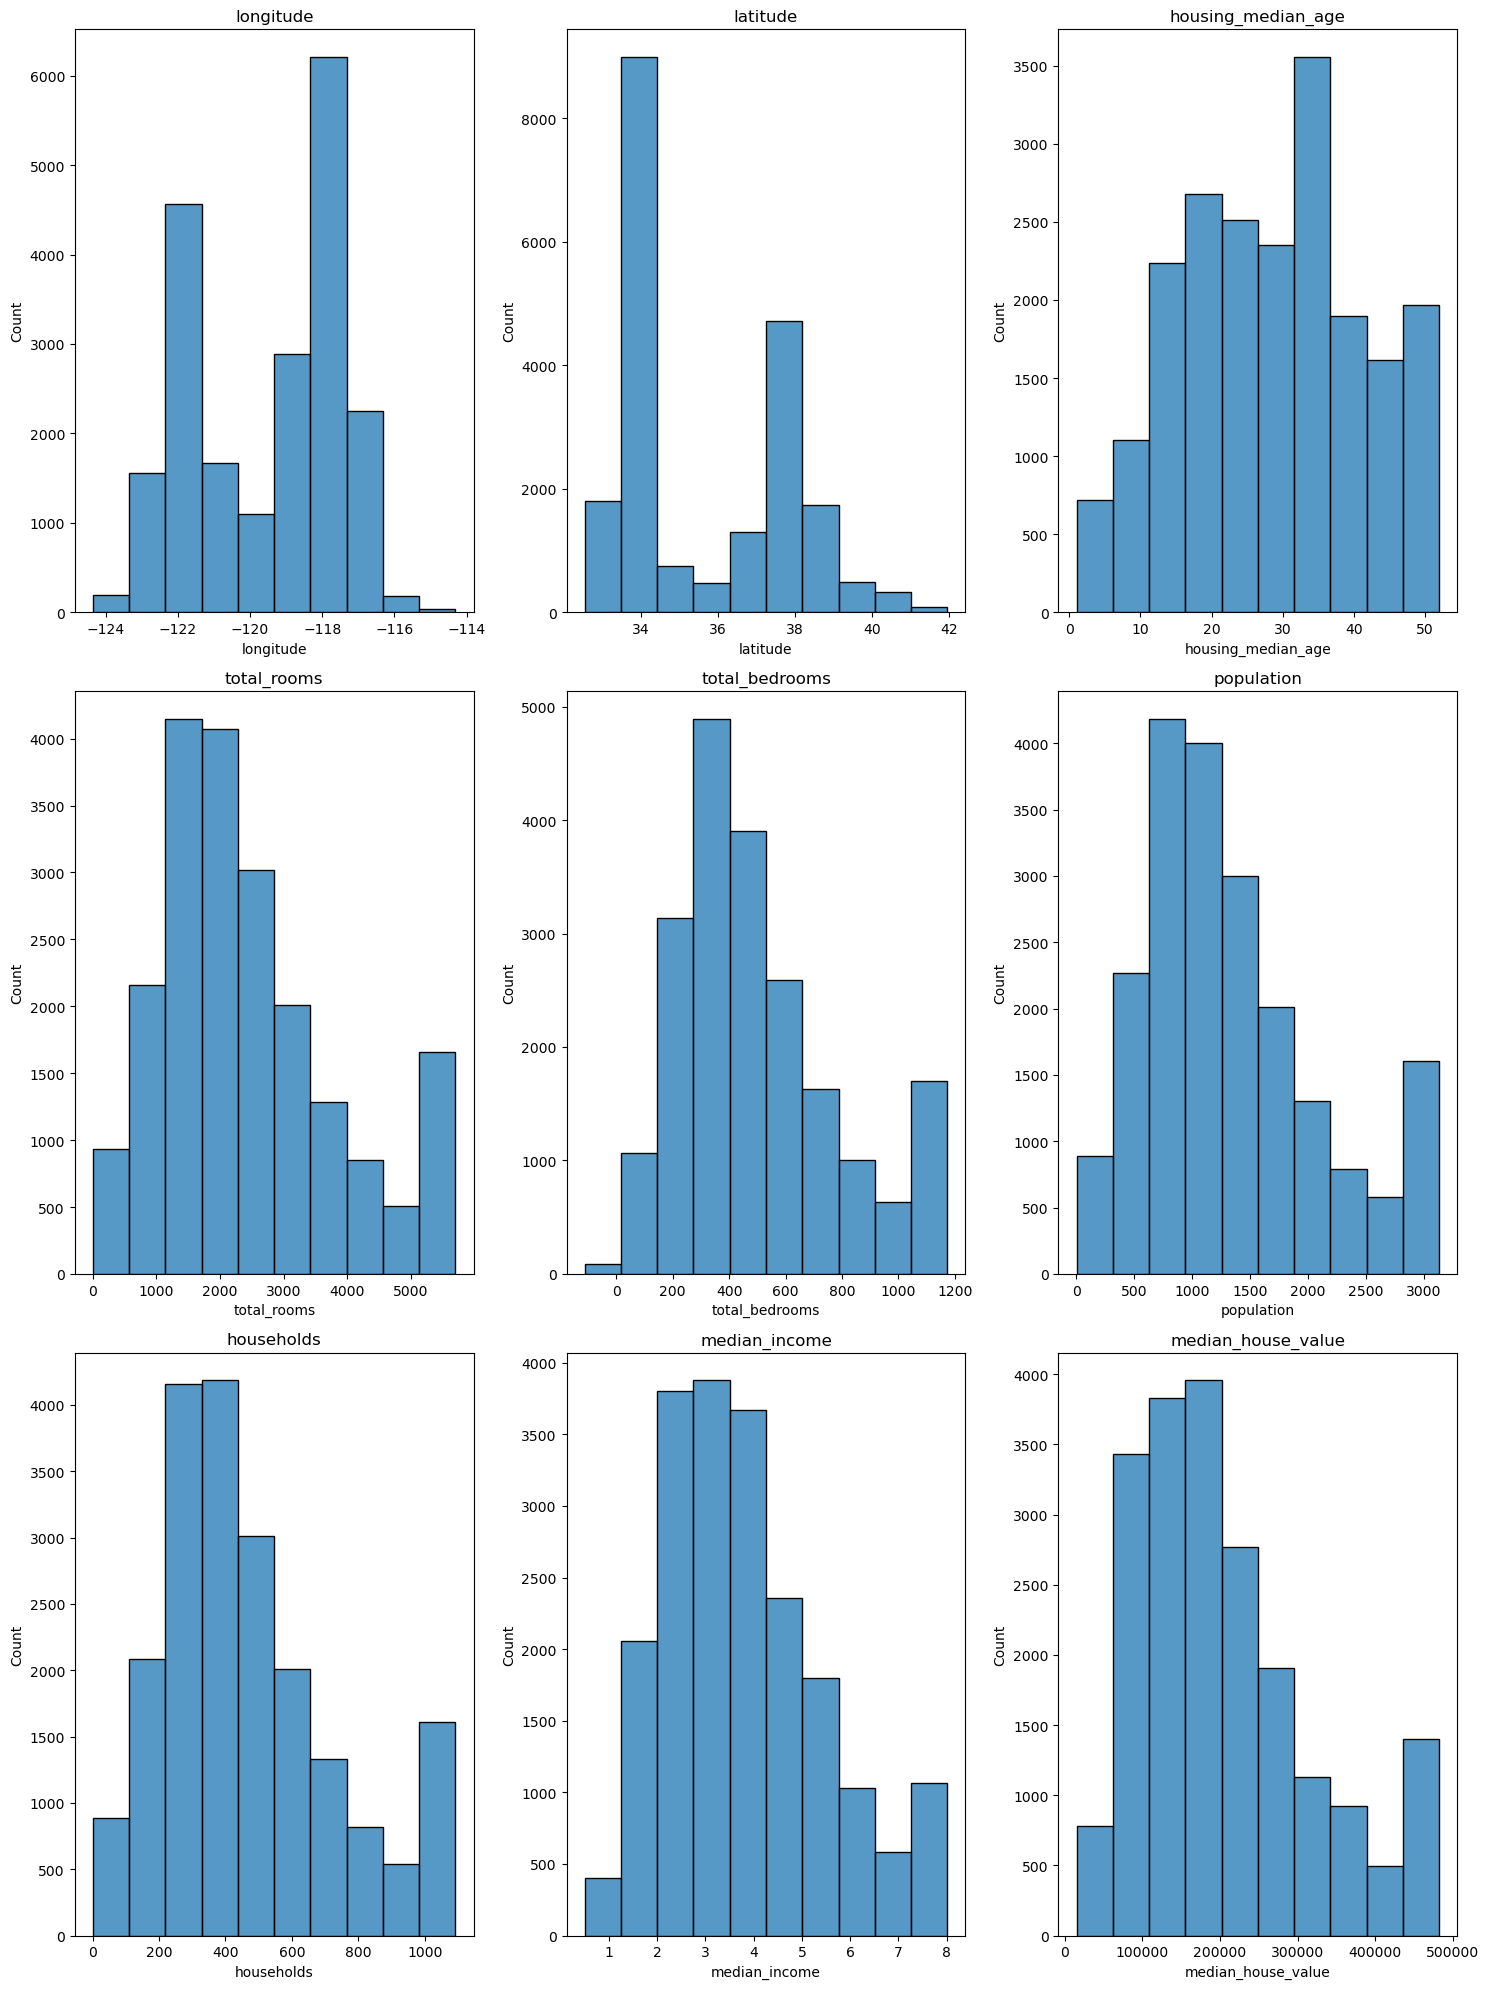

In [22]:
#verificando novamente a distribuição das colunas da nossa base
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(housing_imputed.columns):
    if column not in ['ocean_proximity', 'representative_income']:
        sns.histplot(housing_imputed[column], ax=axes[i], bins=10)
        axes[i].set_title(column)

plt.tight_layout()
plt.show()

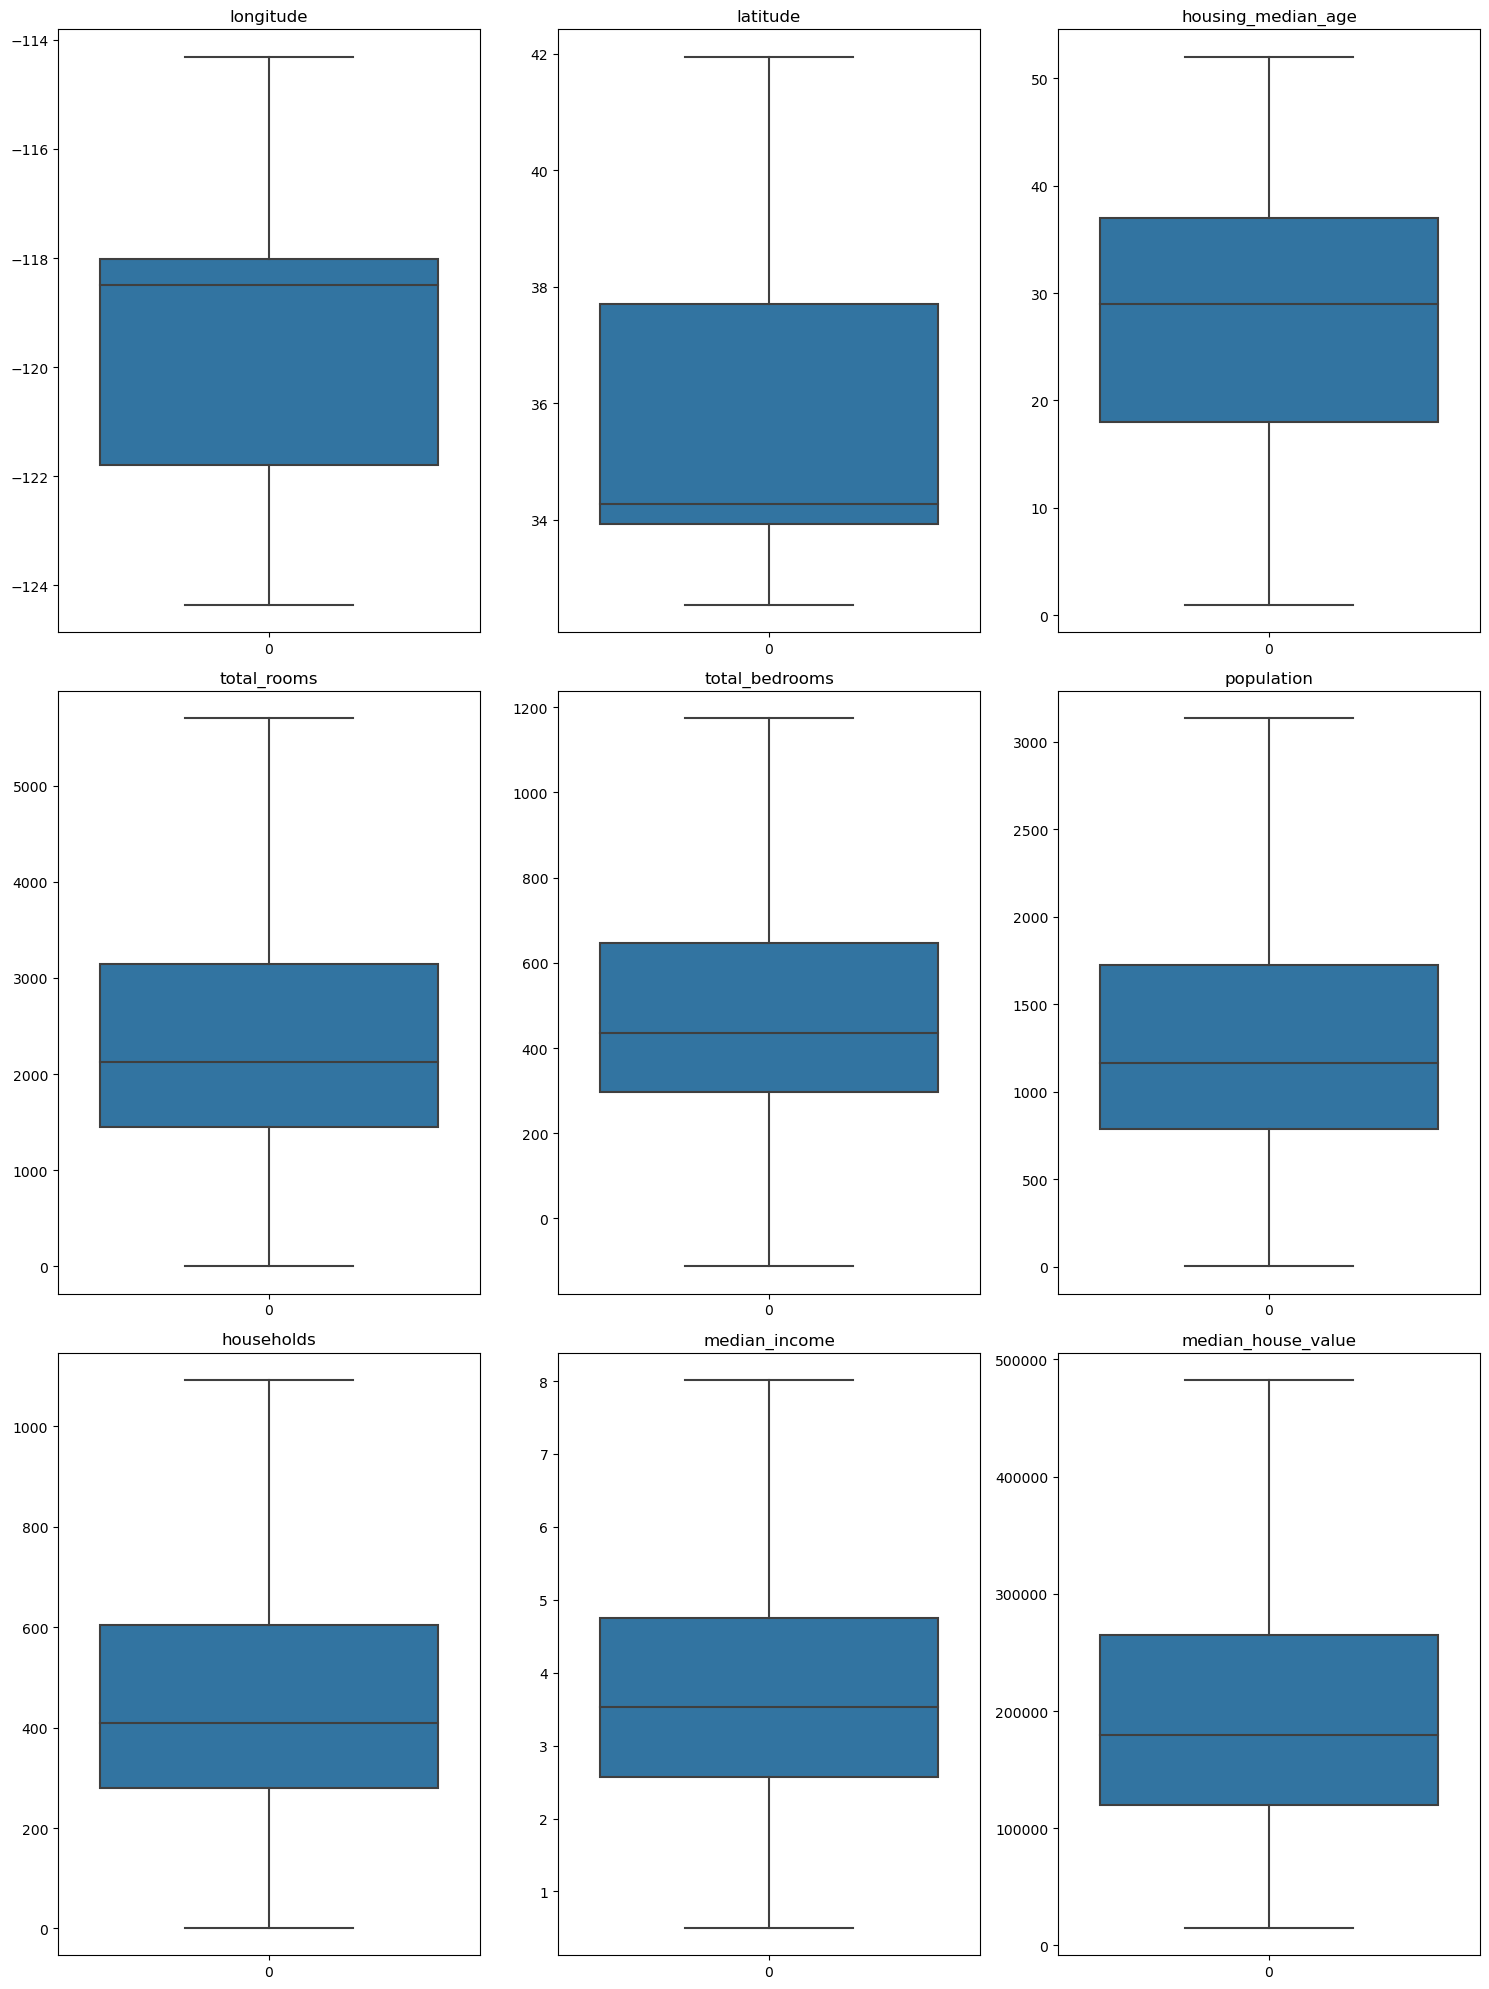

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(housing_imputed.columns):
    if column not in ['ocean_proximity', 'representative_income']:
        sns.boxplot(housing_imputed[column], ax=axes[i])
        axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [24]:
#relembrando os dados da coluna categórica ocean_proximity para estarmos tratando ela
housing_imputed.ocean_proximity.nunique()

5

In [25]:
housing_imputed.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
#excluindo as linhas com "ISLAND" por ter pouquissimas aparições comparadas com as demais, sem impacto no nosso dataset
housing_imputed.drop(housing_imputed[housing_imputed['ocean_proximity'] == 'ISLAND'].index, inplace=True)

In [27]:
housing_imputed.shape

(20635, 11)

In [28]:
#padronizando nossos valores
housing_imputed['ocean_proximity'] = housing_imputed['ocean_proximity'].str.lower()
housing_imputed['ocean_proximity']

0        near bay
1        near bay
2        near bay
3        near bay
4        near bay
           ...   
20635      inland
20636      inland
20637      inland
20638      inland
20639      inland
Name: ocean_proximity, Length: 20635, dtype: object

In [29]:
housing_imputed['ocean_proximity'] = housing_imputed['ocean_proximity'].str.replace(' ', '_')
housing_imputed['ocean_proximity']

0        near_bay
1        near_bay
2        near_bay
3        near_bay
4        near_bay
           ...   
20635      inland
20636      inland
20637      inland
20638      inland
20639      inland
Name: ocean_proximity, Length: 20635, dtype: object

In [30]:
housing_imputed.ocean_proximity.value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
Name: ocean_proximity, dtype: int64

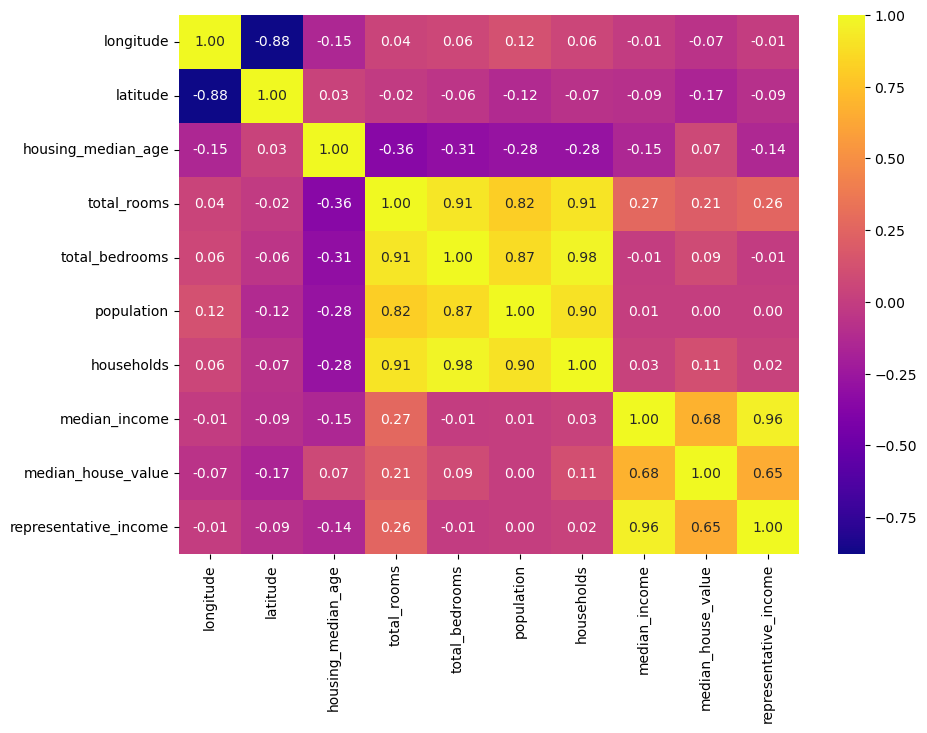

In [31]:
#voltando para as análises de correlação entre as váriaveis
plt.figure(figsize = (10,7))
sns.heatmap(housing_imputed.corr('spearman', numeric_only=True), cmap='plasma', annot=True, fmt='.2f')
plt.show()

In [32]:
corr_matrix = housing_imputed.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False) #nossa variável target

median_house_value       1.000000
median_income            0.690183
representative_income    0.646534
total_rooms              0.173916
housing_median_age       0.104062
households               0.081269
total_bedrooms           0.063067
population              -0.030431
longitude               -0.046558
latitude                -0.145164
Name: median_house_value, dtype: float64

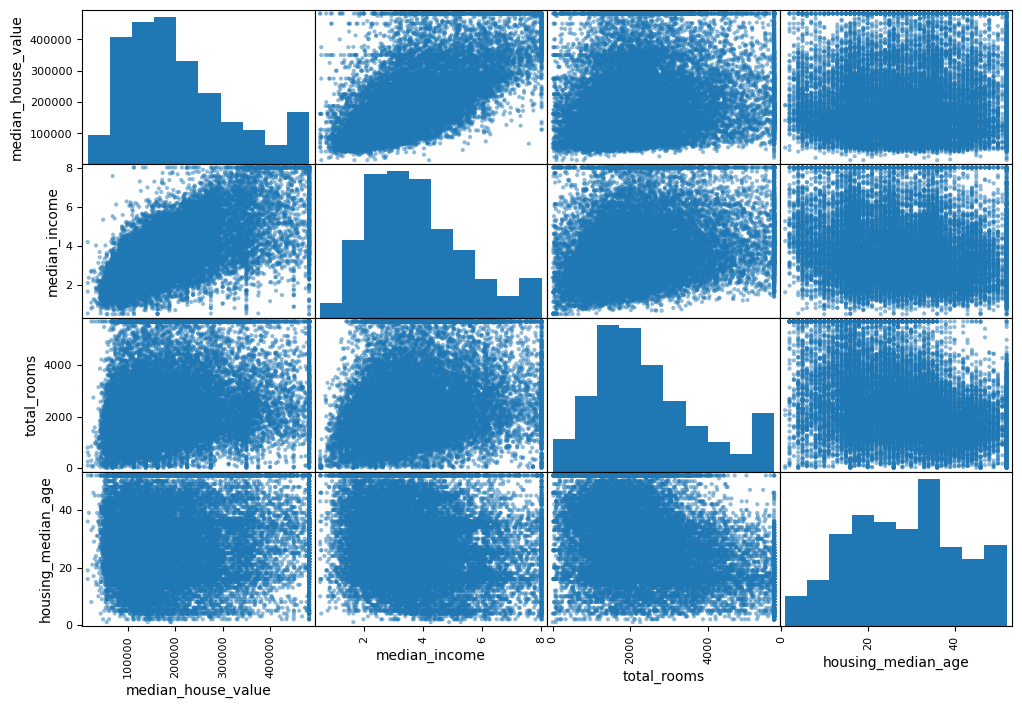

In [33]:
#podemos perceber algumas correlações, mesmo que "fracas" mas que existem (utilizando de base nossa Series acima)
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(housing_imputed[cols], figsize=(12,8))
plt.show()

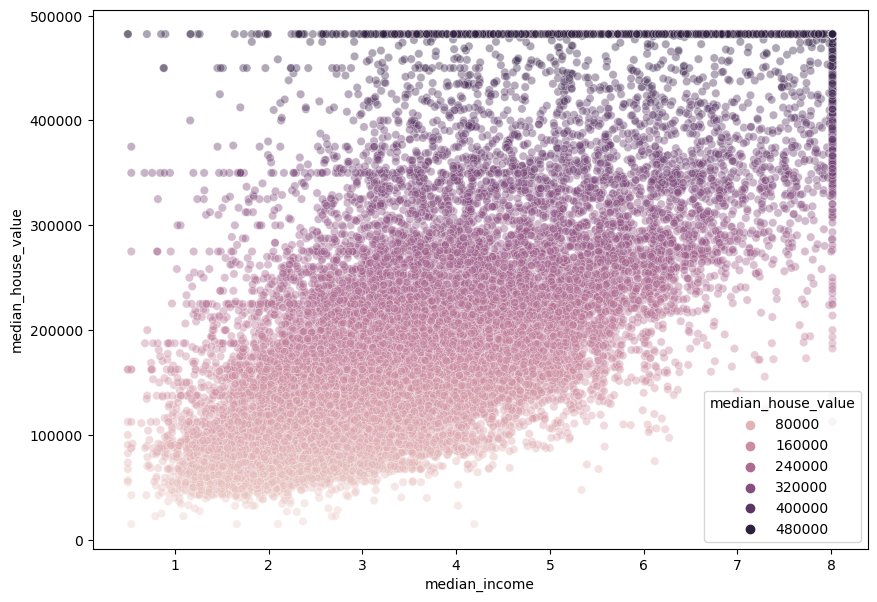

In [34]:
#quanto maior a renda, maior o valor das casas
plt.figure(figsize = (10,7))
sns.scatterplot(data=housing_imputed, x='median_income', y='median_house_value', alpha=0.4, hue='median_house_value')
plt.show()

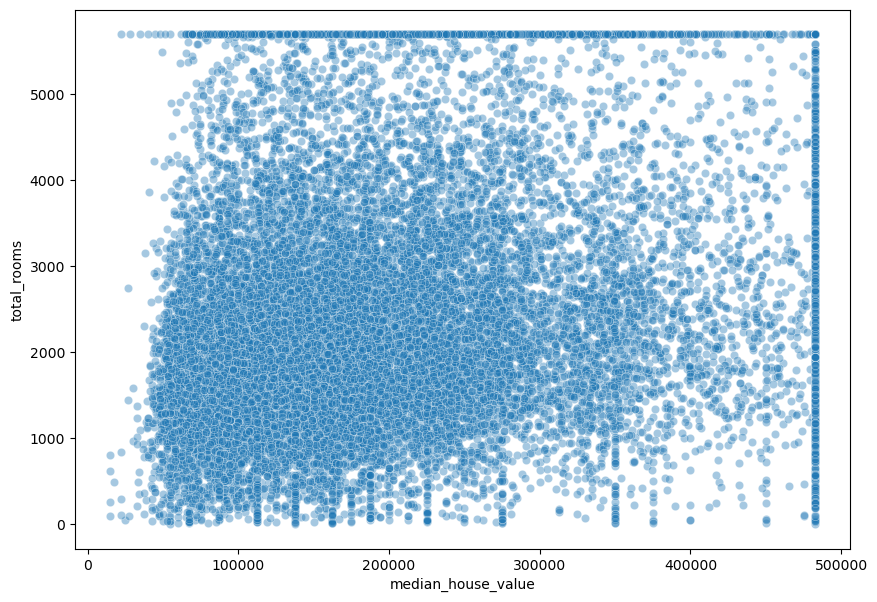

In [35]:
#quanto maior o valor das casas, tende-se a ser maior o número de cômodos, mesmo que não seja uma "regra"
plt.figure(figsize = (10,7))
sns.scatterplot(data=housing_imputed, x='median_house_value', y='total_rooms', alpha=0.4)
plt.show()

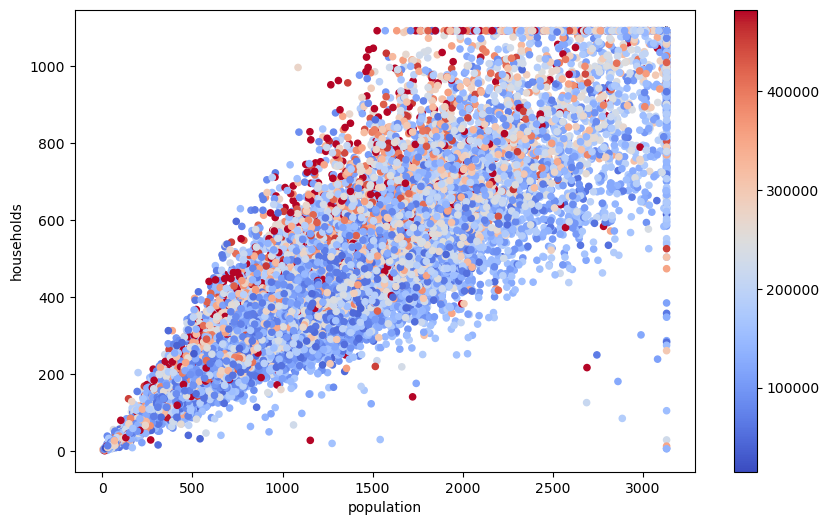

In [36]:
#valores das casas em relação a população e a quantidade de casas
fig, ax = plt.subplots()
housing_imputed.plot(kind='scatter', x='population', y='households', c=housing_imputed['median_house_value'],
                     cmap='coolwarm', colorbar=True, alpha=1, figsize=(10,6), ax=ax)
plt.show()

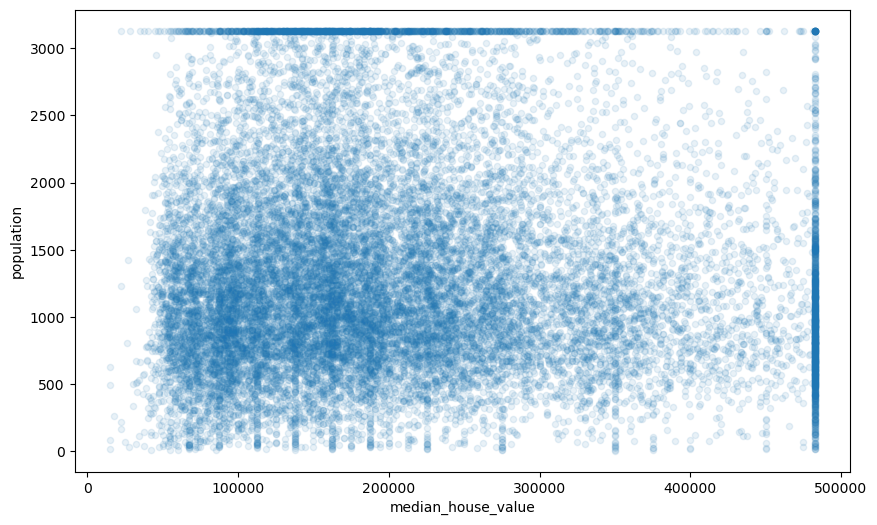

In [37]:
#mesmo que aparente isso no gráfico acima, o valor das casas não está fortemente correlacionado com a população
fig, ax = plt.subplots()
housing_imputed.plot(kind='scatter', x='median_house_value', y='population',
                     alpha=0.1, figsize=(10,6), ax=ax)
plt.show()

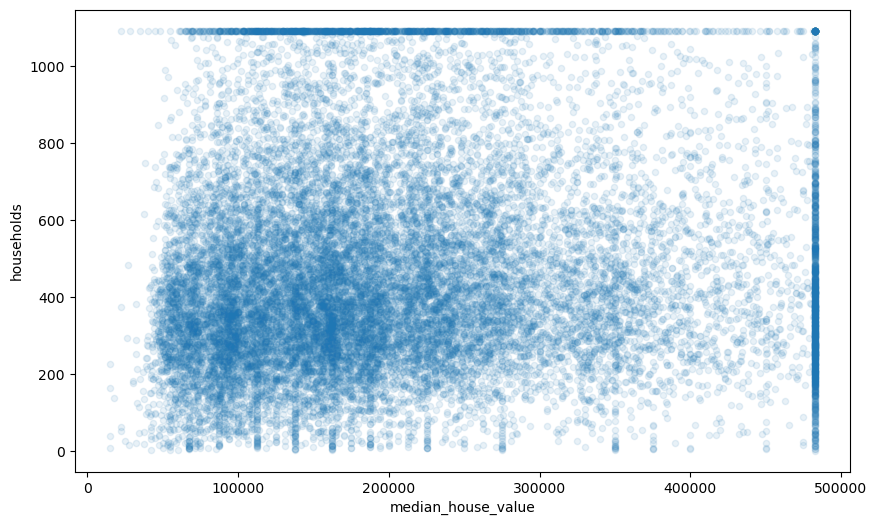

In [38]:
#nem com o número de casas...
#mas existe uma correlação, de certa forma, que indique que a população e o número de casas pode levar o aumento dos valores das casas
fig, ax = plt.subplots()
housing_imputed.plot(kind='scatter', x='median_house_value', y='households',
                     alpha=0.1, figsize=(10,6), ax=ax)
plt.show()

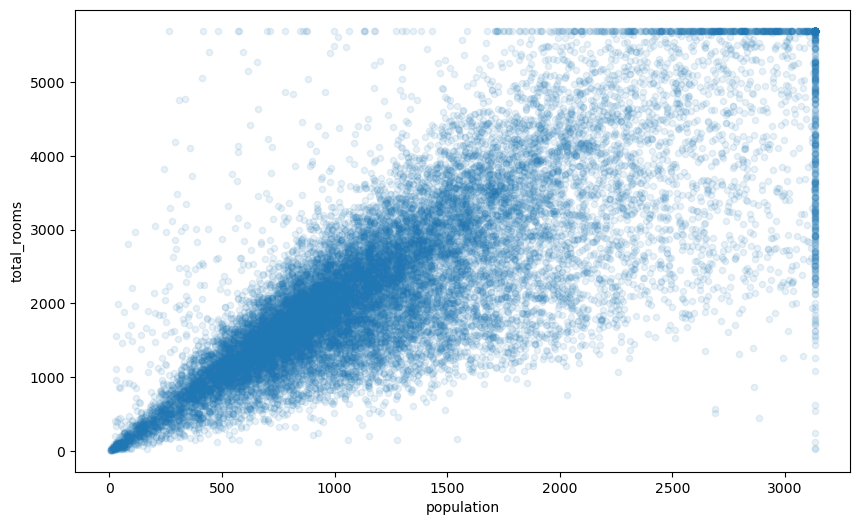

In [39]:
#aqui existe uma correlação muito forte entre população e número de cômodos
fig, ax = plt.subplots()
housing_imputed.plot(kind='scatter', x='population', y='total_rooms',
                     alpha=0.1, figsize=(10,6), ax=ax)
plt.show()

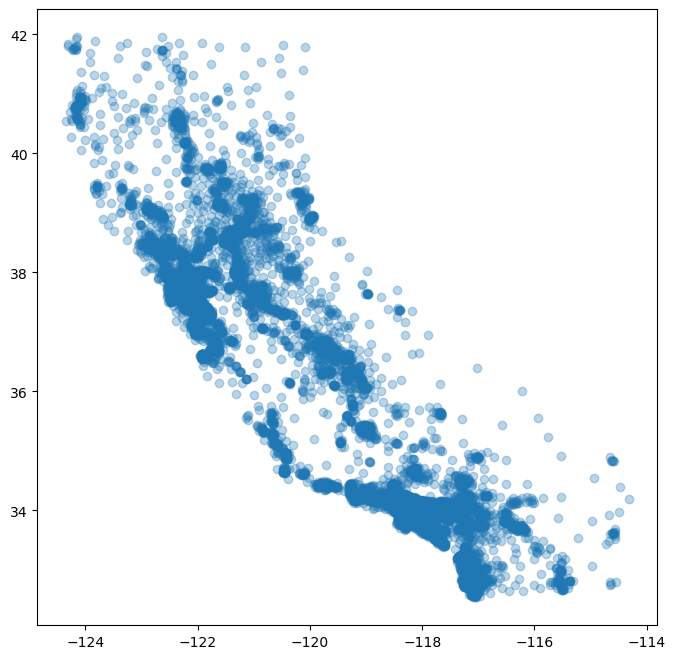

In [40]:
#distribuição das casas pela Califórnia
plt.figure(figsize=(8,8))
plt.scatter(x=housing_imputed['longitude'], y=housing_imputed['latitude'], alpha=0.3)
plt.show()

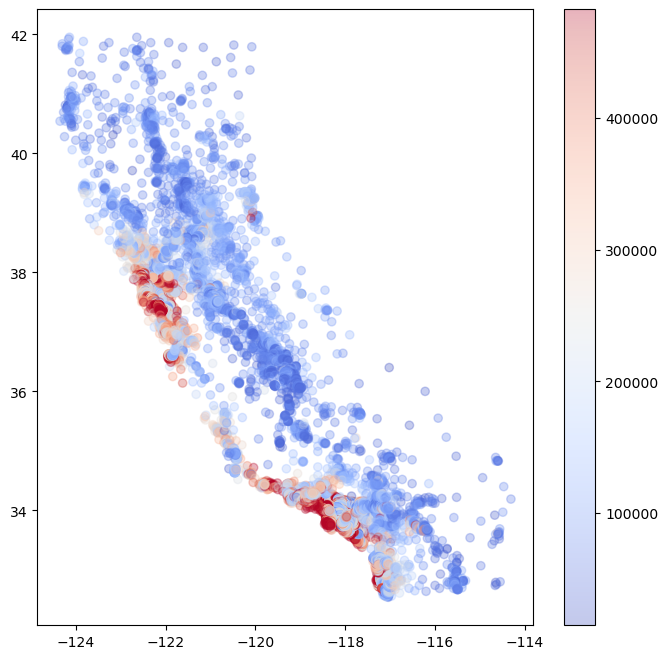

In [41]:
#áreas mais próximas ao litoral tem casas mais valorizadas
#(perto de San Francisco, norte da Califórnia, Los Angeles, San Diego e sul da Califórnia)
plt.figure(figsize=(8,8))
plt.scatter(x=housing_imputed['longitude'], y=housing_imputed['latitude'], alpha=0.3,
            c=housing_imputed['median_house_value'], cmap='coolwarm')
plt.colorbar()
plt.show()

In [42]:
#def get_distance(lat, long):
#    return np.linalg.norm(np.array([lat,long]) - center)

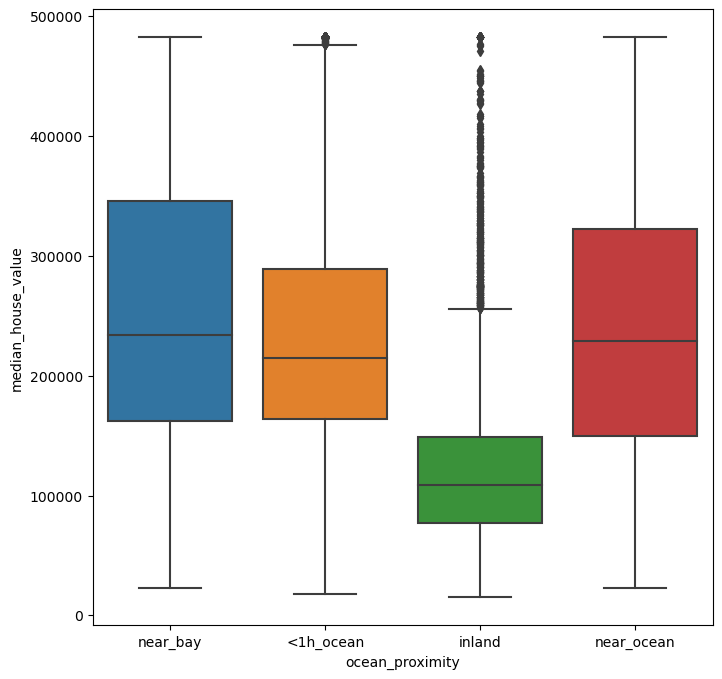

In [43]:
#analisando os valores das casas, renda e população de acordo com a proximidade ao oceano
#podemos tirar insights em cima desses boxplots abaixo
plt.figure(figsize=(8,8))
sns.boxplot(data=housing_imputed, x='ocean_proximity', y='median_house_value')
plt.show()

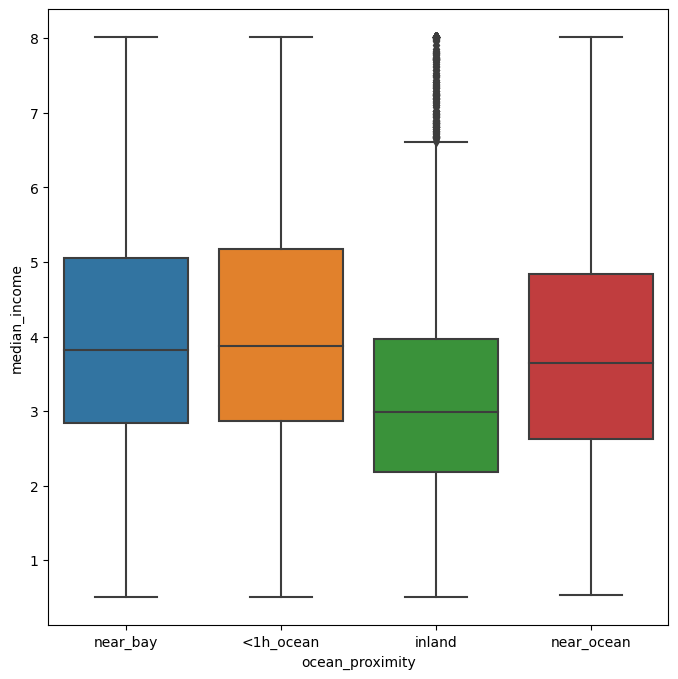

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(data=housing_imputed, x='ocean_proximity', y='median_income')
plt.show()

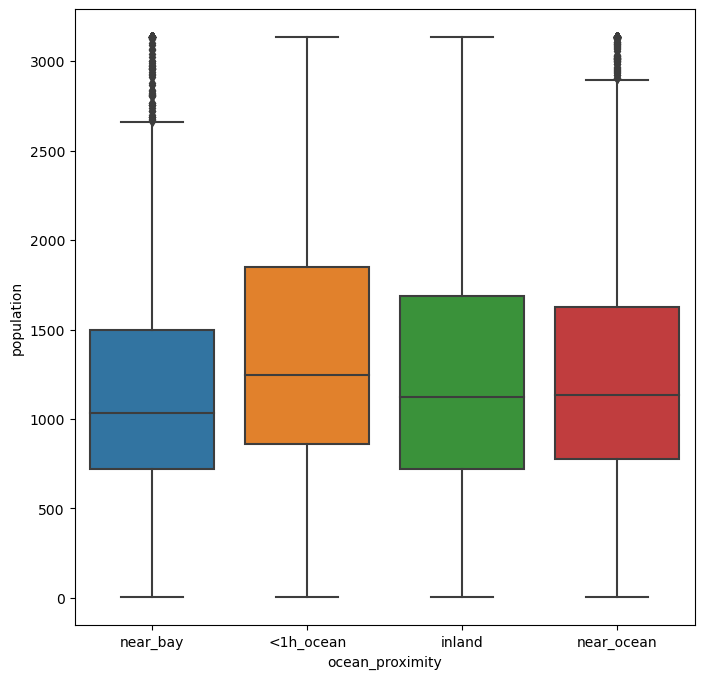

In [45]:
plt.figure(figsize=(8,8))
sns.boxplot(data=housing_imputed, x='ocean_proximity', y='population')
plt.show()

In [46]:
#feature handling: transformando coluna categórica em numérica usando scikit learn
labelEncoder = LabelEncoder()
print(housing_imputed['ocean_proximity'].value_counts())
housing_imputed['ocean_proximity'] = labelEncoder.fit_transform(housing_imputed['ocean_proximity'])
print('---------------------------------------------------')
print(housing_imputed['ocean_proximity'].value_counts())
housing_imputed.describe()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
Name: ocean_proximity, dtype: int64
---------------------------------------------------
0    9136
1    6551
3    2658
2    2290
Name: ocean_proximity, dtype: int64


longitude      latitude  housing_median_age   total_rooms  \
count  20635.000000  20635.000000        20635.000000  20635.000000   
mean    -119.569999     35.632412           28.636152   2441.902575   
std        2.003685      2.135918           12.583924   1397.859491   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.000000   
50%     -118.500000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000   5698.375000   

       total_bedrooms    population    households  median_income  \
count    20635.000000  20635.000000  20635.000000   20635.000000   
mean       502.689858   1337.121105    469.066731       3.801266   
std        287.261212    765.561218    265.518130       1.657765   
min       -112.080009      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563100   
50%        435.000000   1166.000000    409.000000       3.535200   
75%        647.000000   1725.000000    605.000000       4.743700   
max       1173.500000   3132.000000   1092.500000       8.013025   

       median_house_value  ocean_proximity  representative_income  
count        20635.000000     20635.000000           20635.000000  
mean        205938.952435         0.925854               3.006882  
std         113192.930024         1.031268               1.054652  
min          14999.000000         0.000000               1.000000  
25%         119600.000000         0.000000               2.000000  
50%         179700.000000         1.000000               3.000000  
75%         264700.000000         1.000000               4.000000  
max         482412.500000         3.000000               5.000000

In [60]:
#separando nosso dataset para utilizar em nosso modelo, variáveis independentes e variável dependente
housing_id = housing_imputed.drop('median_house_value', axis=1)
housing_dp = housing_imputed['median_house_value']

In [48]:
housing_id.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0      880.000           129.0   
1    -122.22     37.86                21.0     5698.375          1106.0   
2    -122.24     37.85                52.0     1467.000           190.0   
3    -122.25     37.85                52.0     1274.000           235.0   
4    -122.25     37.85                52.0     1627.000           280.0   

   population  households  median_income  ocean_proximity  \
0       322.0       126.0       8.013025                2   
1      2401.0      1092.5       8.013025                2   
2       496.0       177.0       7.257400                2   
3       558.0       219.0       5.643100                2   
4       565.0       259.0       3.846200                2   

   representative_income  
0                    5.0  
1                    5.0  
2                    5.0  
3                    4.0  
4                    3.0

In [61]:
#dividindo 80% para treino, 20% para teste
x_train, x_test, y_train, y_test = train_test_split(housing_id, housing_dp, test_size=0.2, random_state=42)
print(f'x_train shape {x_train.shape} and size {x_train.size}')
print(f'x_test shape {x_test.shape} and size {x_test.size}')
print(f'y_train shape {y_train.shape} and size {y_train.size}')
print(f'y_test shape {y_test.shape} and size {y_test.size}')

x_train shape (16508, 10) and size 165080
x_test shape (4127, 10) and size 41270
y_train shape (16508,) and size 16508
y_test shape (4127,) and size 4127


(array([[16508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [16508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [16508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [  564.,  1452.,  3171.,  3382.,  2579.,  1753.,  1094.,   729.,
           421.,  1363.],
        [ 8728.,  6353.,  1427.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [ 1345.,  5558.,  4870.,  2320.,  1046.,  1369.,     0.,     0.,
             0.,     0.],
        [ 9494.,  5863.,  1151.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [16508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [16508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [16508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]]),
 array([

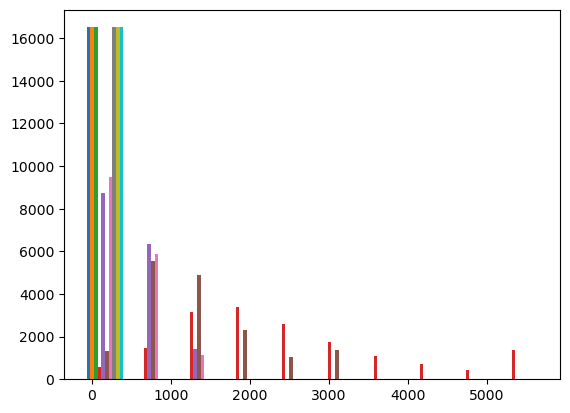

In [57]:
plt.hist(x_train)

In [62]:
x_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19985    -119.31     36.20                23.0       1837.0           332.0   
11236    -117.96     33.81                34.0       1416.0           277.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
8663     -118.38     33.83                40.0       3070.0           570.0   
6248     -117.97     34.05                34.0       2050.0           495.0   
...          ...       ...                 ...          ...             ...   
11289    -117.94     33.79                24.0       4179.0           784.0   
11969    -117.43     33.98                21.0       2634.0           421.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15800    -122.44     37.76                52.0       2959.0           683.0   

       population  households  median_income  ocean_proximity  \
19985      1064.0       335.0         3.1453                1   
11236       980.0       284.0         4.7772                0   
2271        874.0       380.0         3.5542                1   
8663       1264.0       506.0         5.1626                0   
6248       1832.0       465.0         2.8333                0   
...           ...         ...            ...              ...   
11289      1902.0       733.0         4.7986                0   
11969      1376.0       406.0         4.2589                1   
5390       1756.0       527.0         2.9344                0   
860        1777.0       559.0         5.7192                0   
15800      1145.0       666.0         4.2222                2   

       representative_income  
19985                    3.0  
11236                    4.0  
2271                     3.0  
8663                     4.0  
6248                     2.0  
...                      ...  
11289                    4.0  
11969                    3.0  
5390                     2.0  
860                      4.0  
15800                    3.0  

[16508 rows x 10 columns]

In [63]:
#padronizando os conjuntos para todas variáveis independentes ficarem na mesma escala
#evitando que qualquer variável domine o modelo
independent_scaler = StandardScaler()
x_train = independent_scaler.fit_transform(x_train)
x_test = independent_scaler.transform(x_test)

In [65]:
pd.DataFrame(x_train)

0         1         2         3         4         5         6  \
0      0.135860  0.258337 -0.441215 -0.440533 -0.598779 -0.360787 -0.509747   
1      0.807952 -0.857554  0.432192 -0.740292 -0.788634 -0.469726 -0.700167   
2     -0.108085  0.529139  1.146797 -0.052485 -0.257041 -0.607196 -0.341730   
3      0.598857 -0.848216  0.908595  0.437381  0.222774 -0.101410  0.128720   
4      0.802974 -0.745498  0.432192 -0.288874 -0.036119  0.635222 -0.024363   
...         ...       ...       ...       ...       ...       ...       ...   
16503  0.817909 -0.866892 -0.361814  1.227006  0.961482  0.726004  0.976276   
16504  1.071811 -0.778181 -0.600016  0.126943 -0.291560  0.043842 -0.244653   
16505  0.598857 -0.754836  0.590993 -0.252561  0.219322  0.536659  0.207128   
16506 -1.183433  0.902659 -1.076420  0.796949  0.315975  0.563893  0.326607   
16507 -1.422399  0.986701  1.861402  0.358348  0.612839 -0.255739  0.726116   

              7         8         9  
0     -0.399912  0.073841 -0.011990  
1      0.582032 -0.898216  0.935039  
2     -0.153869  0.073841 -0.011990  
3      0.813935 -0.898216  0.935039  
4     -0.587648 -0.898216 -0.959019  
...         ...       ...       ...  
16503  0.594909 -0.898216  0.935039  
16504  0.270162  0.073841 -0.011990  
16505 -0.526814 -0.898216 -0.959019  
16506  1.148851 -0.898216  0.935039  
16507  0.248079  1.045897 -0.011990  

[16508 rows x 10 columns]

(array([[ 165., 1998., 3417.,  983., 1163., 5097., 3369.,  213.,   80.,
           23.],
        [   0.,  870., 3765., 4383.,  517., 1720., 3695., 1102.,  352.,
          104.],
        [ 460., 1200., 2646., 2637., 2835., 3124., 1845., 1761.,    0.,
            0.],
        [   0.,  828., 2759., 4494., 3310., 2018., 1108.,  617., 1374.,
            0.],
        [   0.,  722., 2884., 4548., 3274., 1962., 1108.,  617., 1393.,
            0.],
        [   0.,  782., 2843., 4433., 3339., 2015., 1085.,  645., 1366.,
            0.],
        [   0.,  792., 2791., 4490., 3345., 1975., 1116.,  619., 1380.,
            0.],
        [  33.,  868., 2986., 3848., 3326., 2222., 1387.,  826.,  385.,
          627.],
        [   0.,    0., 7310.,    0., 5242.,    0., 1856.,    0., 2100.,
            0.],
        [ 649.,    0., 5251.,    0., 5752.,    0., 2954.,    0., 1902.,
            0.]]),
 array([-2.37328517, -1.8416556 , -1.31002602, -0.77839645, -0.24676687,
         0.2848627 ,  0.81649227,  

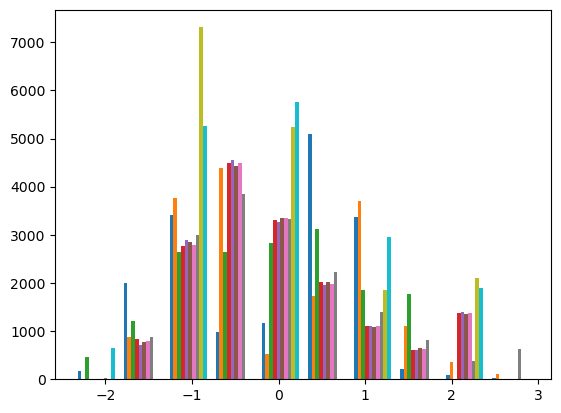

In [59]:
plt.hist(x_train)

In [51]:
#chamando nosso modelo de regressão linear utilizando scikit learn
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
preds = lr.predict(x_test)

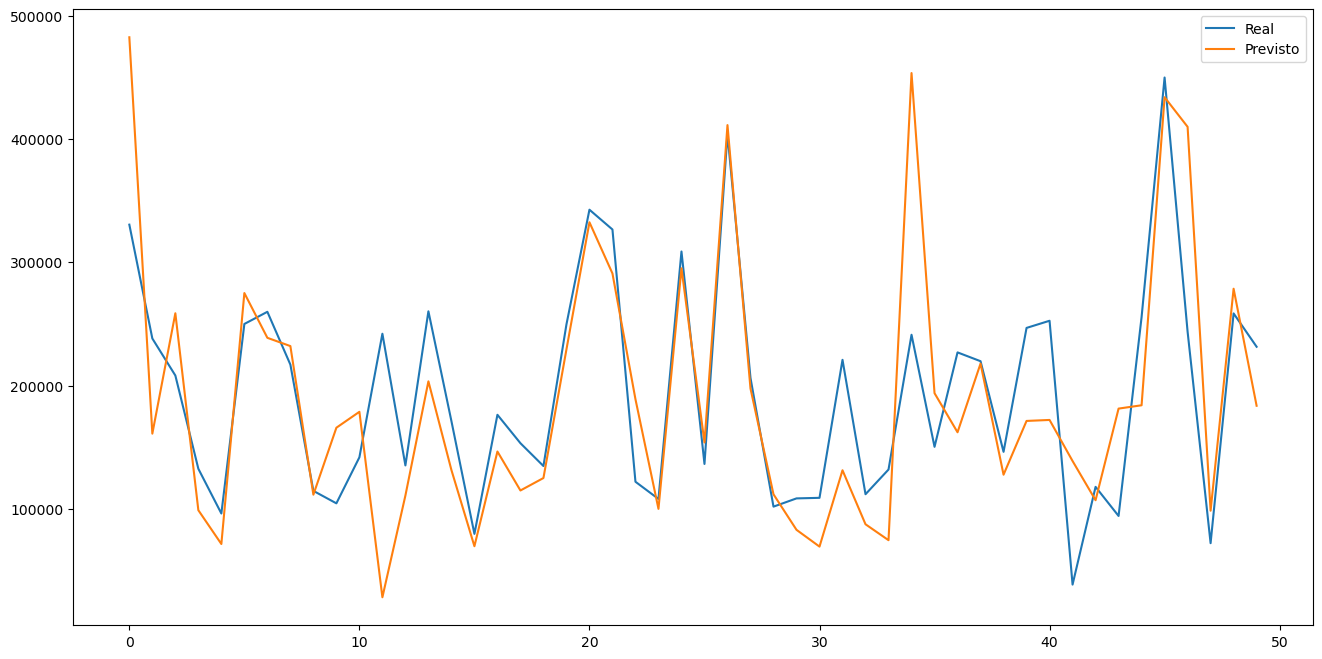

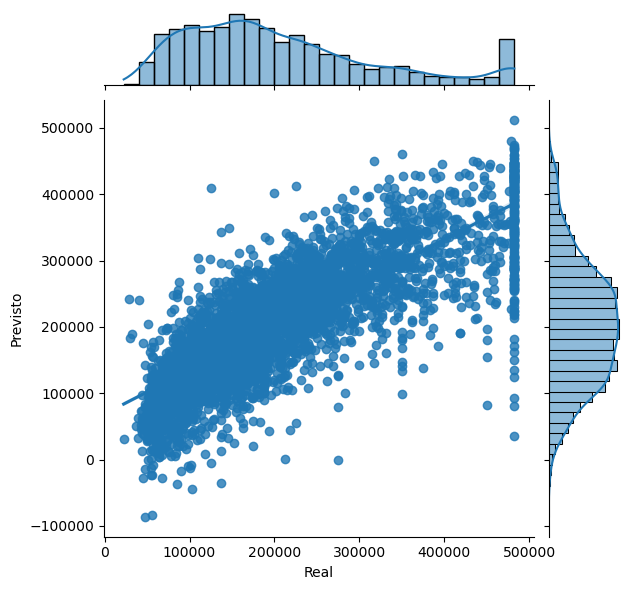

In [53]:
#existem algumas variações entre os valores reais e os previstos usando este modelo
test = pd.DataFrame({'Previsto': preds, 'Real': y_test})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Real', 'Previsto'])
sns.jointplot(x='Real', y='Previsto', data=test, kind='reg')
plt.show()

In [54]:
#calculando nosso RMSE
print(mean_squared_error(y_test, preds, squared=False))

66798.91386006986
